In [1]:
# ------------- Test for pathlib -----------------#
from pathlib import Path

import pandas as pd

p = Path("D:\\datasets")
p

WindowsPath('D:/datasets')

In [5]:
from domainbed.lib import misc

misc.Tee(p / 'out.text')

In [12]:
import os

path = "D:\\datasets"
for file in os.scandir(path):
    if file.is_dir():
        print(file.name)

213试验台相关资料
CWRU
SWTU-compound-bearing-datesets
TerraIncognita_train_output
terra_incognita
复合故障数据集


In [28]:
from pathlib import Path

path = "D:\\datasets"
path = Path(path)
print(str(path))
for child in path.glob('*'):
    if child.is_dir():
        print(child.name)

D:\datasets
213试验台相关资料
CWRU
SWTU-compound-bearing-datesets
TerraIncognita_train_output
terra_incognita
复合故障数据集


In [5]:
import json
from pathlib import Path

results = {
    'step': 0,
    'epoch': 1,
}
path = "D:\datasets\TerraIncognita_train_output"
path = Path(path)
epochs_path = path / 'results.json'
with open(epochs_path.absolute(), 'a') as f:
    f.write(json.dumps(results, sort_keys=True) + "\n")


In [1]:
import h5py
from pathlib import Path

path = "D:\datasets\复合故障数据集\数据\Case 1"
path = Path(path)

read_file = h5py.File(path / 'B1H.h5', 'r')
out = read_file['x']

import numpy as np
import pandas as pd

signals = pd.DataFrame(np.array(out))
labels = list(read_file['label'])

In [12]:
from matplotlib import pyplot as plt

fault_type = ['正常', '裂纹', '断齿', '缺齿', '磨损', '点蚀', '磨损+点蚀', '裂纹+缺齿', '裂纹+断齿']
data_segment = 5120 // 2
sampling_frequency = 5120
window = 'tukey'
nperseg = 255
noverlap = 170
pic_size = 56 * 1
x_len = pic_size * 5
f_len = pic_size * 2
sig = signals.iloc[0][5120 * 10: 5120 * 11]



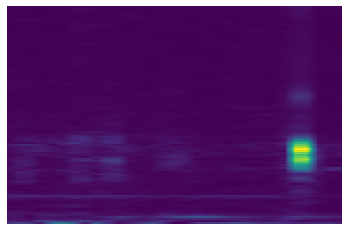

In [22]:
from scipy import signal
from scipy.interpolate import interp2d

f, t, Zxx = signal.stft(sig, sampling_frequency, window=window, nperseg=nperseg, noverlap=noverlap)
newF = interp2d(t, f, np.abs(Zxx), kind='linear')
t_new = np.linspace(0, 1 / sampling_frequency * data_segment, num=x_len)
f_new = np.linspace(0, sampling_frequency // 2, num=f_len)
Z_new = newF(t_new, f_new)
Xn, Yn = np.meshgrid(t_new, f_new)

plt.pcolormesh(Xn, Yn, Z_new, shading='auto')
# plt.show()
plt.axis('off')
plt.savefig('tt.png', dpi=300, bbox_inches='tight', pad_inches=0)


0.075015